In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session
from tensorflow import keras

import time
%matplotlib inline

## Lab vanishing gradient


In this lab you will impement a complete exploration and results visualization for the following experiment configurations  with dense neural networks:

- with the following numbers of layers [2,3,4,5,6,7,8,9,10]
- with the following neurons per layer [3,5,10,30]
- with activations ReLU, Sigmoid and LeakyReLU

In total, you must train and test 36 network architectures for each activation function.

The experimentation must be done with the MNIST Digits datasets (1500 items) using a random partition of 50/50 for train and test.

For each configuration you must record the **accuracy in test** and the **time used to train** the model.

Then, you will need to build the following visualizations

- one heat map for each activation function illustrating the **accuracy in test** for each configuration
- one heat map for each activation function illustrating the **time used to train** for each configuration
- a scatter plot of all your experiments, showing:
    - the time used to train in the x-axis
    - the accuracy in test in the y-axis
    - the number of layers as the size of the dots
    - expetiments for each activation function in different colors   
- a bar plot showing the average performance of each activation function for each number of layers.




In [3]:
layers = [2,3,4,5,6,7,8,9,10]

neurons = [30,10,5,3]
activation = ['relu','sigmoid',tf.nn.leaky_relu]
reluAcc= np.zeros((len(neurons), len(layers)))
reluTime = np.zeros((len(neurons), len(layers)))
leakyAcc= np.zeros((len(neurons), len(layers)))
leakyTime= np.zeros((len(neurons), len(layers)))

sigTime= np.zeros((len(neurons), len(layers)))
sigAcc= np.zeros((len(neurons), len(layers)))


mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print "dimension de las imagenes y las clases", X.shape, y.shape


dimension de las imagenes y las clases (1500, 784) (1500,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
X_train = X_train[:1500]
X_test  = X_test[:1500]
y_train_oh = np.eye(10)[y_train[:1500]]
y_test_oh  = np.eye(10)[y_test[:1500]]
print X_train.shape, y_train_oh.shape

(750, 784) (750, 10)


In [5]:
def get_model(input_dim=784, output_dim=10, num_hidden_layers=6, hidden_size=10, activation="relu"):

    clear_session()
    model = Sequential()
    model.add(Dense(hidden_size, activation=activation, input_dim=input_dim, name="Layer_%02d_Input"%(0)))
    
    for i in range(num_hidden_layers):
        model.add(Dense(hidden_size, activation=activation, name="Layer_%02d_Hidden"%(i+1)))
   
    model.add(Dense(output_dim, activation="softmax", name="Layer_%02d_Output"%(num_hidden_layers+1)))
        
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.reset_states()
    return model

In [6]:
for k, act in enumerate(activation, start=0):
    for j, neuron in enumerate(neurons, start=0):
        for i, layer in enumerate(layers, start=0):
        
            model = get_model(num_hidden_layers=layer, hidden_size=neuron,activation=act)
            #!rm -rf log/sigmoid
            #tb_callback = keras.callbacks.TensorBoard(log_dir='./log/', histogram_freq=1,  write_grads=True, write_graph=True, write_images=True)
            startFit =time.time()
            #time_callback = TimeHistory()
            model.fit(X_train, y_train_oh, epochs=50, batch_size=32)
            endFit = time.time() - startFit 
            score, acc = model.evaluate(X_test, y_test_oh,
                            batch_size=1)
            value = (acc,endFit)
            print(i,j,value)
            if (act == 'relu'):
                reluAcc[j][i] = acc
                reluTime[j][i] = endFit
            elif (act == 'sigmoid'):
                sigTime[j][i] = endFit
                sigAcc[j][i] = acc
            elif (act == tf.nn.leaky_relu):
                leakyAcc[j][i]= acc
                leakyTime[j][i] = endFit
    

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 2.0920 - acc: 0.3627
Epoch 2/50
750/750 [==============================] - 0s 268us/step - loss: 1.5973 - acc: 0.5440
Epoch 3/50
750/750 [==============================] - 0s 276us/step - loss: 1.1031 - acc: 0.7173
Epoch 4/50
750/750 [==============================] - 0s 266us/step - loss: 0.7163 - acc: 0.8413
Epoch 5/50
750/750 [==============================] - 0s 293us/step - loss: 0.5127 - acc: 0.8653
Epoch 6/50
750/750 [==============================] - 0s 278us/step - loss: 0.4098 - acc: 0.8947
Epoch 7/50
750/750 [==============================] - 0s 272us/step - loss: 0.3268 - acc: 0.9253
Epoch 8/50
750/750 [==============================] - 0s 278us/step - loss: 0.2881 - acc: 0.9347
Epoch 9/50
750/750 [==============================] - 0s 253us/step - loss: 0.2409 - acc: 0.9467
Epoch 10/50
750/750 [==============================] - 0s 289us/step - loss: 0.2043 - acc: 0.9560
Epoch 11/50
750/750 [==========

750/750 [==============================] - 0s 289us/step - loss: 0.0070 - acc: 1.0000
Epoch 34/50
750/750 [==============================] - 0s 277us/step - loss: 0.0065 - acc: 1.0000
Epoch 35/50
750/750 [==============================] - 0s 260us/step - loss: 0.0060 - acc: 1.0000
Epoch 36/50
750/750 [==============================] - 0s 284us/step - loss: 0.0055 - acc: 1.0000
Epoch 37/50
750/750 [==============================] - 0s 264us/step - loss: 0.0049 - acc: 1.0000
Epoch 38/50
750/750 [==============================] - 0s 279us/step - loss: 0.0046 - acc: 1.0000
Epoch 39/50
750/750 [==============================] - 0s 281us/step - loss: 0.0042 - acc: 1.0000
Epoch 40/50
750/750 [==============================] - 0s 284us/step - loss: 0.0039 - acc: 1.0000
Epoch 41/50
750/750 [==============================] - 0s 284us/step - loss: 0.0036 - acc: 1.0000
Epoch 42/50
750/750 [==============================] - 0s 269us/step - loss: 0.0033 - acc: 1.0000
Epoch 43/50
750/750 [===========

Epoch 15/50
750/750 [==============================] - 0s 325us/step - loss: 0.0960 - acc: 0.9800
Epoch 16/50
750/750 [==============================] - 0s 350us/step - loss: 0.0868 - acc: 0.9840
Epoch 17/50
750/750 [==============================] - 0s 359us/step - loss: 0.0801 - acc: 0.9840
Epoch 18/50
750/750 [==============================] - 0s 375us/step - loss: 0.0512 - acc: 0.9920
Epoch 19/50
750/750 [==============================] - 0s 343us/step - loss: 0.0374 - acc: 0.9987
Epoch 20/50
750/750 [==============================] - 0s 350us/step - loss: 0.0375 - acc: 0.9973
Epoch 21/50
750/750 [==============================] - 0s 343us/step - loss: 0.0497 - acc: 0.9893
Epoch 22/50
750/750 [==============================] - 0s 331us/step - loss: 0.0307 - acc: 0.9987
Epoch 23/50
750/750 [==============================] - 0s 317us/step - loss: 0.0181 - acc: 0.9987
Epoch 24/50
750/750 [==============================] - 0s 332us/step - loss: 0.0132 - acc: 1.0000
Epoch 25/50
750/750 

750/750 [==============================] - 0s 367us/step - loss: 8.9404e-04 - acc: 1.0000
Epoch 48/50
750/750 [==============================] - 0s 358us/step - loss: 8.4425e-04 - acc: 1.0000
Epoch 49/50
750/750 [==============================] - 0s 344us/step - loss: 8.0371e-04 - acc: 1.0000
Epoch 50/50
750/750 [==============================] - 2s 3ms/step
(4, 0, (0.8293333333333334, 17.748388051986694))
Epoch 1/50
750/750 [==============================] - 3s 4ms/step - loss: 2.2540 - acc: 0.1800
Epoch 2/50
750/750 [==============================] - 0s 397us/step - loss: 1.8565 - acc: 0.3147
Epoch 3/50
750/750 [==============================] - 0s 380us/step - loss: 1.4346 - acc: 0.4467
Epoch 4/50
750/750 [==============================] - 0s 409us/step - loss: 1.2046 - acc: 0.5733
Epoch 5/50
750/750 [==============================] - 0s 362us/step - loss: 1.0024 - acc: 0.6427
Epoch 6/50
750/750 [==============================] - 0s 360us/step - loss: 0.8886 - acc: 0.6987
Epoch 7/50

750/750 [==============================] - 0s 407us/step - loss: 0.0039 - acc: 1.0000
Epoch 29/50
750/750 [==============================] - 0s 448us/step - loss: 0.0033 - acc: 1.0000
Epoch 30/50
750/750 [==============================] - 0s 388us/step - loss: 0.0028 - acc: 1.0000
Epoch 31/50
750/750 [==============================] - 0s 427us/step - loss: 0.0025 - acc: 1.0000
Epoch 32/50
750/750 [==============================] - 0s 421us/step - loss: 0.0022 - acc: 1.0000
Epoch 33/50
750/750 [==============================] - 0s 422us/step - loss: 0.0019 - acc: 1.0000
Epoch 34/50
750/750 [==============================] - 0s 432us/step - loss: 0.0018 - acc: 1.0000
Epoch 35/50
750/750 [==============================] - 0s 400us/step - loss: 0.0016 - acc: 1.0000
Epoch 36/50
750/750 [==============================] - 0s 411us/step - loss: 0.0015 - acc: 1.0000
Epoch 37/50
750/750 [==============================] - 0s 431us/step - loss: 0.0013 - acc: 1.0000
Epoch 38/50
750/750 [===========

750/750 [==============================] - 0s 473us/step - loss: 0.6591 - acc: 0.7507
Epoch 10/50
750/750 [==============================] - 0s 491us/step - loss: 0.5442 - acc: 0.8293
Epoch 11/50
750/750 [==============================] - 0s 465us/step - loss: 0.4112 - acc: 0.8653
Epoch 12/50
750/750 [==============================] - 0s 466us/step - loss: 0.3524 - acc: 0.8813
Epoch 13/50
750/750 [==============================] - 0s 510us/step - loss: 0.3357 - acc: 0.8933
Epoch 14/50
750/750 [==============================] - 0s 524us/step - loss: 0.2801 - acc: 0.9160
Epoch 15/50
750/750 [==============================] - 0s 500us/step - loss: 0.1962 - acc: 0.9467
Epoch 16/50
750/750 [==============================] - 0s 457us/step - loss: 0.2054 - acc: 0.9387
Epoch 17/50
750/750 [==============================] - 0s 466us/step - loss: 0.1649 - acc: 0.9573
Epoch 18/50
750/750 [==============================] - 0s 495us/step - loss: 0.1061 - acc: 0.9747
Epoch 19/50
750/750 [===========

750/750 [==============================] - 0s 293us/step - loss: 0.1034 - acc: 0.9853
Epoch 41/50
750/750 [==============================] - 0s 263us/step - loss: 0.0982 - acc: 0.9840
Epoch 42/50
750/750 [==============================] - 0s 235us/step - loss: 0.0924 - acc: 0.9867
Epoch 43/50
750/750 [==============================] - 0s 259us/step - loss: 0.0848 - acc: 0.9907
Epoch 44/50
750/750 [==============================] - 0s 283us/step - loss: 0.0797 - acc: 0.9907
Epoch 45/50
750/750 [==============================] - 0s 274us/step - loss: 0.0760 - acc: 0.9907
Epoch 46/50
750/750 [==============================] - 0s 277us/step - loss: 0.0703 - acc: 0.9947
Epoch 47/50
750/750 [==============================] - 0s 259us/step - loss: 0.0657 - acc: 0.9973
Epoch 48/50
750/750 [==============================] - 0s 246us/step - loss: 0.0620 - acc: 0.9973
Epoch 49/50
750/750 [==============================] - 0s 292us/step - loss: 0.0585 - acc: 0.9973
Epoch 50/50
750/750 [===========

Epoch 22/50
750/750 [==============================] - 0s 307us/step - loss: 0.5237 - acc: 0.8200
Epoch 23/50
750/750 [==============================] - 0s 282us/step - loss: 0.4966 - acc: 0.8333
Epoch 24/50
750/750 [==============================] - 0s 291us/step - loss: 0.4612 - acc: 0.8440
Epoch 25/50
750/750 [==============================] - 0s 300us/step - loss: 0.4305 - acc: 0.8587
Epoch 26/50
750/750 [==============================] - 0s 297us/step - loss: 0.4010 - acc: 0.8627
Epoch 27/50
750/750 [==============================] - 0s 275us/step - loss: 0.3778 - acc: 0.8853
Epoch 28/50
750/750 [==============================] - 0s 277us/step - loss: 0.3514 - acc: 0.8907
Epoch 29/50
750/750 [==============================] - 0s 321us/step - loss: 0.3225 - acc: 0.9013
Epoch 30/50
750/750 [==============================] - 0s 287us/step - loss: 0.3062 - acc: 0.9133
Epoch 31/50
750/750 [==============================] - 0s 284us/step - loss: 0.2935 - acc: 0.9067
Epoch 32/50
750/750 

750/750 [==============================] - 0s 336us/step - loss: 2.0866 - acc: 0.2267
Epoch 4/50
750/750 [==============================] - 0s 344us/step - loss: 1.9018 - acc: 0.2787
Epoch 5/50
750/750 [==============================] - 0s 355us/step - loss: 1.6968 - acc: 0.3227
Epoch 6/50
750/750 [==============================] - 0s 330us/step - loss: 1.5231 - acc: 0.3773
Epoch 7/50
750/750 [==============================] - 0s 344us/step - loss: 1.3948 - acc: 0.4093
Epoch 8/50
750/750 [==============================] - 0s 350us/step - loss: 1.3184 - acc: 0.4480
Epoch 9/50
750/750 [==============================] - 0s 358us/step - loss: 1.2144 - acc: 0.5080
Epoch 10/50
750/750 [==============================] - 0s 375us/step - loss: 1.1445 - acc: 0.5373
Epoch 11/50
750/750 [==============================] - 0s 348us/step - loss: 1.0759 - acc: 0.5813
Epoch 12/50
750/750 [==============================] - 0s 335us/step - loss: 1.0209 - acc: 0.5907
Epoch 13/50
750/750 [=================

750/750 [==============================] - 0s 432us/step - loss: 0.1520 - acc: 0.9613
Epoch 36/50
750/750 [==============================] - 0s 332us/step - loss: 0.1493 - acc: 0.9627
Epoch 37/50
750/750 [==============================] - 0s 373us/step - loss: 0.1284 - acc: 0.9693
Epoch 38/50
750/750 [==============================] - 0s 376us/step - loss: 0.1132 - acc: 0.9747
Epoch 39/50
750/750 [==============================] - 0s 339us/step - loss: 0.1118 - acc: 0.9680
Epoch 40/50
750/750 [==============================] - 0s 357us/step - loss: 0.1006 - acc: 0.9747
Epoch 41/50
750/750 [==============================] - 0s 378us/step - loss: 0.0970 - acc: 0.9760
Epoch 42/50
750/750 [==============================] - 0s 358us/step - loss: 0.0901 - acc: 0.9773
Epoch 43/50
750/750 [==============================] - 0s 373us/step - loss: 0.0934 - acc: 0.9787
Epoch 44/50
750/750 [==============================] - 0s 377us/step - loss: 0.0952 - acc: 0.9693
Epoch 45/50
750/750 [===========

750/750 [==============================] - 0s 378us/step - loss: 0.9947 - acc: 0.6000
Epoch 17/50
750/750 [==============================] - 0s 390us/step - loss: 0.9697 - acc: 0.6280
Epoch 18/50
750/750 [==============================] - 0s 400us/step - loss: 0.9047 - acc: 0.6507
Epoch 19/50
750/750 [==============================] - 0s 369us/step - loss: 0.8751 - acc: 0.6587
Epoch 20/50
750/750 [==============================] - 0s 393us/step - loss: 0.8399 - acc: 0.6813
Epoch 21/50
750/750 [==============================] - 0s 404us/step - loss: 0.7952 - acc: 0.7280
Epoch 22/50
750/750 [==============================] - 0s 381us/step - loss: 0.7501 - acc: 0.7280
Epoch 23/50
750/750 [==============================] - 0s 421us/step - loss: 0.6957 - acc: 0.7453
Epoch 24/50
750/750 [==============================] - 0s 400us/step - loss: 0.6541 - acc: 0.7733
Epoch 25/50
750/750 [==============================] - 0s 382us/step - loss: 0.6023 - acc: 0.7973
Epoch 26/50
750/750 [===========

750/750 [==============================] - 0s 415us/step - loss: 0.4054 - acc: 0.8733
Epoch 49/50
750/750 [==============================] - 0s 434us/step - loss: 0.2919 - acc: 0.9253
Epoch 50/50
750/750 [==============================] - 3s 4ms/step
(8, 1, (0.668, 22.9942889213562))
Epoch 1/50
750/750 [==============================] - 2s 3ms/step - loss: 2.2940 - acc: 0.0813
Epoch 2/50
750/750 [==============================] - 0s 265us/step - loss: 2.2460 - acc: 0.1200
Epoch 3/50
750/750 [==============================] - 0s 254us/step - loss: 2.1822 - acc: 0.1680
Epoch 4/50
750/750 [==============================] - 0s 269us/step - loss: 2.0961 - acc: 0.2573
Epoch 5/50
750/750 [==============================] - 0s 253us/step - loss: 2.0267 - acc: 0.2653
Epoch 6/50
750/750 [==============================] - 0s 280us/step - loss: 1.9645 - acc: 0.3173
Epoch 7/50
750/750 [==============================] - 0s 251us/step - loss: 1.9124 - acc: 0.3360
Epoch 8/50
750/750 [==================

750/750 [==============================] - 0s 238us/step - loss: 0.7383 - acc: 0.8027
Epoch 29/50
750/750 [==============================] - 0s 237us/step - loss: 0.7158 - acc: 0.7987
Epoch 30/50
750/750 [==============================] - 0s 228us/step - loss: 0.6939 - acc: 0.8080
Epoch 31/50
750/750 [==============================] - 0s 267us/step - loss: 0.6681 - acc: 0.8133
Epoch 32/50
750/750 [==============================] - 0s 248us/step - loss: 0.6478 - acc: 0.8147
Epoch 33/50
750/750 [==============================] - 0s 341us/step - loss: 0.6350 - acc: 0.8253
Epoch 34/50
750/750 [==============================] - 0s 304us/step - loss: 0.6116 - acc: 0.8307
Epoch 35/50
750/750 [==============================] - 0s 418us/step - loss: 0.5948 - acc: 0.8333
Epoch 36/50
750/750 [==============================] - 0s 396us/step - loss: 0.5683 - acc: 0.8520
Epoch 37/50
750/750 [==============================] - 0s 268us/step - loss: 0.5588 - acc: 0.8493
Epoch 38/50
750/750 [===========

Epoch 10/50
750/750 [==============================] - 0s 295us/step - loss: 1.7978 - acc: 0.2787
Epoch 11/50
750/750 [==============================] - 0s 318us/step - loss: 1.7645 - acc: 0.3000
Epoch 12/50
750/750 [==============================] - 0s 295us/step - loss: 1.7286 - acc: 0.3147
Epoch 13/50
750/750 [==============================] - 0s 288us/step - loss: 1.7035 - acc: 0.3200
Epoch 14/50
750/750 [==============================] - 0s 286us/step - loss: 1.6783 - acc: 0.3253
Epoch 15/50
750/750 [==============================] - 0s 286us/step - loss: 1.6483 - acc: 0.3387
Epoch 16/50
750/750 [==============================] - 0s 293us/step - loss: 1.6287 - acc: 0.3480
Epoch 17/50
750/750 [==============================] - 0s 292us/step - loss: 1.6049 - acc: 0.3560
Epoch 18/50
750/750 [==============================] - 0s 284us/step - loss: 1.5756 - acc: 0.3627
Epoch 19/50
750/750 [==============================] - 0s 279us/step - loss: 1.5567 - acc: 0.3720
Epoch 20/50
750/750 

750/750 [==============================] - 0s 494us/step - loss: 1.0851 - acc: 0.5733
Epoch 43/50
750/750 [==============================] - 0s 435us/step - loss: 1.0648 - acc: 0.5680
Epoch 44/50
750/750 [==============================] - 0s 500us/step - loss: 1.0305 - acc: 0.6013
Epoch 45/50
750/750 [==============================] - 0s 636us/step - loss: 1.0164 - acc: 0.5973
Epoch 46/50
750/750 [==============================] - 0s 444us/step - loss: 0.9928 - acc: 0.5960
Epoch 47/50
750/750 [==============================] - 1s 710us/step - loss: 0.9692 - acc: 0.6173
Epoch 48/50
750/750 [==============================] - 1s 782us/step - loss: 0.9637 - acc: 0.6093
Epoch 49/50
750/750 [==============================] - 0s 547us/step - loss: 0.9409 - acc: 0.6307
Epoch 50/50
750/750 [==============================] - 4s 5ms/step
(4, 2, (0.5173333333333333, 26.47775101661682))
Epoch 1/50
750/750 [==============================] - 3s 4ms/step - loss: 2.3014 - acc: 0.1013
Epoch 2/50
750/750

750/750 [==============================] - 0s 366us/step - loss: 1.3837 - acc: 0.5013
Epoch 24/50
750/750 [==============================] - 0s 374us/step - loss: 1.3480 - acc: 0.4960
Epoch 25/50
750/750 [==============================] - 0s 379us/step - loss: 1.3234 - acc: 0.5160
Epoch 26/50
750/750 [==============================] - 0s 386us/step - loss: 1.3097 - acc: 0.5040
Epoch 27/50
750/750 [==============================] - 0s 363us/step - loss: 1.2678 - acc: 0.5387
Epoch 28/50
750/750 [==============================] - 0s 374us/step - loss: 1.2436 - acc: 0.5507
Epoch 29/50
750/750 [==============================] - 0s 378us/step - loss: 1.2211 - acc: 0.5640
Epoch 30/50
750/750 [==============================] - 0s 367us/step - loss: 1.1972 - acc: 0.5707
Epoch 31/50
750/750 [==============================] - 0s 357us/step - loss: 1.1664 - acc: 0.5773
Epoch 32/50
750/750 [==============================] - 0s 400us/step - loss: 1.1447 - acc: 0.5733
Epoch 33/50
750/750 [===========

750/750 [==============================] - 0s 433us/step - loss: 2.1689 - acc: 0.1027
Epoch 5/50
750/750 [==============================] - 0s 511us/step - loss: 2.0736 - acc: 0.1293
Epoch 6/50
750/750 [==============================] - 0s 494us/step - loss: 2.0228 - acc: 0.1640
Epoch 7/50
750/750 [==============================] - 0s 456us/step - loss: 1.9861 - acc: 0.2213
Epoch 8/50
750/750 [==============================] - 0s 437us/step - loss: 1.9623 - acc: 0.2320
Epoch 9/50
750/750 [==============================] - 0s 432us/step - loss: 1.9347 - acc: 0.2347
Epoch 10/50
750/750 [==============================] - 0s 431us/step - loss: 1.9150 - acc: 0.2347
Epoch 11/50
750/750 [==============================] - 0s 441us/step - loss: 1.8970 - acc: 0.2373
Epoch 12/50
750/750 [==============================] - 0s 450us/step - loss: 1.8805 - acc: 0.2427
Epoch 13/50
750/750 [==============================] - 0s 426us/step - loss: 1.8721 - acc: 0.2373
Epoch 14/50
750/750 [================

750/750 [==============================] - 0s 220us/step - loss: 1.7059 - acc: 0.3480
Epoch 37/50
750/750 [==============================] - 0s 224us/step - loss: 1.6969 - acc: 0.3493
Epoch 38/50
750/750 [==============================] - 0s 215us/step - loss: 1.6880 - acc: 0.3533
Epoch 39/50
750/750 [==============================] - 0s 206us/step - loss: 1.6772 - acc: 0.3587
Epoch 40/50
750/750 [==============================] - 0s 220us/step - loss: 1.6702 - acc: 0.3680
Epoch 41/50
750/750 [==============================] - 0s 233us/step - loss: 1.6566 - acc: 0.3627
Epoch 42/50
750/750 [==============================] - 0s 226us/step - loss: 1.6512 - acc: 0.3693
Epoch 43/50
750/750 [==============================] - 0s 245us/step - loss: 1.6442 - acc: 0.3720
Epoch 44/50
750/750 [==============================] - 0s 259us/step - loss: 1.6339 - acc: 0.3720
Epoch 45/50
750/750 [==============================] - 0s 236us/step - loss: 1.6197 - acc: 0.4000
Epoch 46/50
750/750 [===========

750/750 [==============================] - 0s 292us/step - loss: 1.7217 - acc: 0.2240
Epoch 18/50
750/750 [==============================] - 0s 282us/step - loss: 1.7040 - acc: 0.2253
Epoch 19/50
750/750 [==============================] - 0s 284us/step - loss: 1.6902 - acc: 0.2253
Epoch 20/50
750/750 [==============================] - 0s 280us/step - loss: 1.6731 - acc: 0.2347
Epoch 21/50
750/750 [==============================] - 0s 274us/step - loss: 1.6640 - acc: 0.2307
Epoch 22/50
750/750 [==============================] - 0s 292us/step - loss: 1.6457 - acc: 0.2347
Epoch 23/50
750/750 [==============================] - 0s 276us/step - loss: 1.6353 - acc: 0.2347
Epoch 24/50
750/750 [==============================] - 0s 278us/step - loss: 1.6180 - acc: 0.2427
Epoch 25/50
750/750 [==============================] - 0s 271us/step - loss: 1.6017 - acc: 0.2467
Epoch 26/50
750/750 [==============================] - 0s 287us/step - loss: 1.5907 - acc: 0.2480
Epoch 27/50
750/750 [===========

750/750 [==============================] - 0s 294us/step - loss: 2.2935 - acc: 0.1373
Epoch 50/50
750/750 [==============================] - 3s 3ms/step
(3, 3, (0.11066666666666666, 15.146424055099487))
Epoch 1/50
750/750 [==============================] - 3s 4ms/step - loss: 2.2976 - acc: 0.1173
Epoch 2/50
750/750 [==============================] - 0s 340us/step - loss: 2.2759 - acc: 0.1347
Epoch 3/50
750/750 [==============================] - 0s 347us/step - loss: 2.2407 - acc: 0.1467
Epoch 4/50
750/750 [==============================] - 0s 353us/step - loss: 2.1993 - acc: 0.1533
Epoch 5/50
750/750 [==============================] - 0s 351us/step - loss: 2.1585 - acc: 0.1773
Epoch 6/50
750/750 [==============================] - 0s 316us/step - loss: 2.1260 - acc: 0.1867
Epoch 7/50
750/750 [==============================] - 0s 313us/step - loss: 2.0988 - acc: 0.1880
Epoch 8/50
750/750 [==============================] - 0s 330us/step - loss: 2.0760 - acc: 0.2040
Epoch 9/50
750/750 [===

750/750 [==============================] - 0s 343us/step - loss: 2.2942 - acc: 0.1373
Epoch 31/50
750/750 [==============================] - 0s 379us/step - loss: 2.2942 - acc: 0.1373
Epoch 32/50
750/750 [==============================] - 0s 371us/step - loss: 2.2941 - acc: 0.1373
Epoch 33/50
750/750 [==============================] - 0s 366us/step - loss: 2.2940 - acc: 0.1373
Epoch 34/50
750/750 [==============================] - 0s 368us/step - loss: 2.2939 - acc: 0.1373
Epoch 35/50
750/750 [==============================] - 0s 373us/step - loss: 2.2939 - acc: 0.1373
Epoch 36/50
750/750 [==============================] - 0s 392us/step - loss: 2.2939 - acc: 0.1373
Epoch 37/50
750/750 [==============================] - 0s 380us/step - loss: 2.2938 - acc: 0.1373
Epoch 38/50
750/750 [==============================] - 0s 376us/step - loss: 2.2937 - acc: 0.1373
Epoch 39/50
750/750 [==============================] - 0s 357us/step - loss: 2.2937 - acc: 0.1373
Epoch 40/50
750/750 [===========

750/750 [==============================] - 0s 380us/step - loss: 2.2973 - acc: 0.1373
Epoch 12/50
750/750 [==============================] - 0s 407us/step - loss: 2.2970 - acc: 0.1373
Epoch 13/50
750/750 [==============================] - 0s 445us/step - loss: 2.2967 - acc: 0.1373
Epoch 14/50
750/750 [==============================] - 0s 423us/step - loss: 2.2965 - acc: 0.1373
Epoch 15/50
750/750 [==============================] - 0s 448us/step - loss: 2.2961 - acc: 0.1373
Epoch 16/50
750/750 [==============================] - 0s 435us/step - loss: 2.2959 - acc: 0.1373
Epoch 17/50
750/750 [==============================] - 0s 385us/step - loss: 2.2957 - acc: 0.1373
Epoch 18/50
750/750 [==============================] - 0s 465us/step - loss: 2.2955 - acc: 0.1373
Epoch 19/50
750/750 [==============================] - 0s 386us/step - loss: 2.2952 - acc: 0.1373
Epoch 20/50
750/750 [==============================] - 0s 380us/step - loss: 2.2952 - acc: 0.1373
Epoch 21/50
750/750 [===========

750/750 [==============================] - 0s 427us/step - loss: 2.2935 - acc: 0.1373
Epoch 44/50
750/750 [==============================] - 0s 436us/step - loss: 2.2936 - acc: 0.1373
Epoch 45/50
750/750 [==============================] - 0s 433us/step - loss: 2.2935 - acc: 0.1373
Epoch 46/50
750/750 [==============================] - 0s 373us/step - loss: 2.2936 - acc: 0.1373
Epoch 47/50
750/750 [==============================] - 0s 375us/step - loss: 2.2935 - acc: 0.1373
Epoch 48/50
750/750 [==============================] - 0s 365us/step - loss: 2.2935 - acc: 0.1373
Epoch 49/50
750/750 [==============================] - 0s 368us/step - loss: 2.2935 - acc: 0.1373
Epoch 50/50
750/750 [==============================] - 3s 4ms/step
(8, 3, (0.11066666666666666, 41.80498003959656))
Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 2.4352 - acc: 0.0933
Epoch 2/50
750/750 [==============================] - 0s 208us/step - loss: 2.3136 - acc: 0.1840
Epoch 3/50
750/750

750/750 [==============================] - 0s 256us/step - loss: 1.5034 - acc: 0.3627
Epoch 25/50
750/750 [==============================] - 0s 283us/step - loss: 1.4837 - acc: 0.3653
Epoch 26/50
750/750 [==============================] - 0s 277us/step - loss: 1.4649 - acc: 0.3733
Epoch 27/50
750/750 [==============================] - 0s 262us/step - loss: 1.4466 - acc: 0.3787
Epoch 28/50
750/750 [==============================] - 0s 269us/step - loss: 1.4268 - acc: 0.3907
Epoch 29/50
750/750 [==============================] - 0s 266us/step - loss: 1.4041 - acc: 0.4080
Epoch 30/50
750/750 [==============================] - 0s 244us/step - loss: 1.3851 - acc: 0.4453
Epoch 31/50
750/750 [==============================] - 0s 238us/step - loss: 1.3660 - acc: 0.4360
Epoch 32/50
750/750 [==============================] - 0s 237us/step - loss: 1.3472 - acc: 0.4547
Epoch 33/50
750/750 [==============================] - 0s 248us/step - loss: 1.3282 - acc: 0.4667
Epoch 34/50
750/750 [===========

750/750 [==============================] - 0s 258us/step - loss: 2.2945 - acc: 0.1373
Epoch 6/50
750/750 [==============================] - 0s 268us/step - loss: 2.2930 - acc: 0.1373
Epoch 7/50
750/750 [==============================] - 0s 223us/step - loss: 2.2907 - acc: 0.1373
Epoch 8/50
750/750 [==============================] - 0s 246us/step - loss: 2.2840 - acc: 0.1373
Epoch 9/50
750/750 [==============================] - 0s 238us/step - loss: 2.2718 - acc: 0.1373
Epoch 10/50
750/750 [==============================] - 0s 294us/step - loss: 2.2399 - acc: 0.1373
Epoch 11/50
750/750 [==============================] - 0s 288us/step - loss: 2.1924 - acc: 0.1933
Epoch 12/50
750/750 [==============================] - 0s 263us/step - loss: 2.1194 - acc: 0.2333
Epoch 13/50
750/750 [==============================] - 0s 260us/step - loss: 2.0364 - acc: 0.2400
Epoch 14/50
750/750 [==============================] - 0s 251us/step - loss: 1.9612 - acc: 0.2347
Epoch 15/50
750/750 [===============

750/750 [==============================] - 0s 265us/step - loss: 1.6990 - acc: 0.2560
Epoch 38/50
750/750 [==============================] - 0s 265us/step - loss: 1.6868 - acc: 0.2827
Epoch 39/50
750/750 [==============================] - ETA: 0s - loss: 1.6739 - acc: 0.285 - 0s 257us/step - loss: 1.6726 - acc: 0.2827
Epoch 40/50
750/750 [==============================] - 0s 246us/step - loss: 1.6607 - acc: 0.2893
Epoch 41/50
750/750 [==============================] - 0s 256us/step - loss: 1.6474 - acc: 0.2867
Epoch 42/50
750/750 [==============================] - 0s 259us/step - loss: 1.6342 - acc: 0.2907
Epoch 43/50
750/750 [==============================] - 0s 238us/step - loss: 1.6224 - acc: 0.2973
Epoch 44/50
750/750 [==============================] - 0s 239us/step - loss: 1.6089 - acc: 0.3013
Epoch 45/50
750/750 [==============================] - 0s 256us/step - loss: 1.5971 - acc: 0.2907
Epoch 46/50
750/750 [==============================] - 0s 256us/step - loss: 1.5847 - acc: 0

750/750 [==============================] - 0s 128us/step - loss: 2.2832 - acc: 0.1373
Epoch 19/50
750/750 [==============================] - 0s 130us/step - loss: 2.2628 - acc: 0.1373
Epoch 20/50
750/750 [==============================] - 0s 128us/step - loss: 2.2234 - acc: 0.1693
Epoch 21/50
750/750 [==============================] - 0s 133us/step - loss: 2.1617 - acc: 0.2227
Epoch 22/50
750/750 [==============================] - 0s 125us/step - loss: 2.0864 - acc: 0.2240
Epoch 23/50
750/750 [==============================] - 0s 130us/step - loss: 2.0271 - acc: 0.2200
Epoch 24/50
750/750 [==============================] - 0s 129us/step - loss: 1.9742 - acc: 0.2200
Epoch 25/50
750/750 [==============================] - 0s 131us/step - loss: 1.9419 - acc: 0.2253
Epoch 26/50
750/750 [==============================] - 0s 126us/step - loss: 1.9244 - acc: 0.2267
Epoch 27/50
750/750 [==============================] - 0s 131us/step - loss: 1.9120 - acc: 0.2267
Epoch 28/50
750/750 [===========

750/750 [==============================] - 1s 896us/step
(7, 0, (0.18933333333333333, 7.680199146270752))
Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 2.4930 - acc: 0.1000
Epoch 2/50
750/750 [==============================] - 0s 135us/step - loss: 2.3653 - acc: 0.1320
Epoch 3/50
750/750 [==============================] - 0s 137us/step - loss: 2.3274 - acc: 0.1373
Epoch 4/50
750/750 [==============================] - 0s 136us/step - loss: 2.3077 - acc: 0.1373
Epoch 5/50
750/750 [==============================] - 0s 135us/step - loss: 2.2983 - acc: 0.1373
Epoch 6/50
750/750 [==============================] - 0s 135us/step - loss: 2.2969 - acc: 0.1373
Epoch 7/50
750/750 [==============================] - 0s 141us/step - loss: 2.2965 - acc: 0.1373
Epoch 8/50
750/750 [==============================] - 0s 139us/step - loss: 2.2965 - acc: 0.1373
Epoch 9/50
750/750 [==============================] - 0s 141us/step - loss: 2.2962 - acc: 0.1373
Epoch 10/50
750/750 [==

750/750 [==============================] - 0s 65us/step - loss: 1.6827 - acc: 0.4173
Epoch 33/50
750/750 [==============================] - 0s 66us/step - loss: 1.6607 - acc: 0.4307
Epoch 34/50
750/750 [==============================] - 0s 66us/step - loss: 1.6392 - acc: 0.4440
Epoch 35/50
750/750 [==============================] - 0s 65us/step - loss: 1.6178 - acc: 0.4467
Epoch 36/50
750/750 [==============================] - 0s 66us/step - loss: 1.5962 - acc: 0.4520
Epoch 37/50
750/750 [==============================] - 0s 68us/step - loss: 1.5752 - acc: 0.4573
Epoch 38/50
750/750 [==============================] - 0s 67us/step - loss: 1.5544 - acc: 0.4573
Epoch 39/50
750/750 [==============================] - 0s 66us/step - loss: 1.5338 - acc: 0.4547
Epoch 40/50
750/750 [==============================] - 0s 67us/step - loss: 1.5143 - acc: 0.4387
Epoch 41/50
750/750 [==============================] - 0s 65us/step - loss: 1.4936 - acc: 0.4613
Epoch 42/50
750/750 [=====================

750/750 [==============================] - 0s 82us/step - loss: 2.2697 - acc: 0.1373
Epoch 15/50
750/750 [==============================] - 0s 87us/step - loss: 2.2609 - acc: 0.1373
Epoch 16/50
750/750 [==============================] - 0s 81us/step - loss: 2.2502 - acc: 0.1373
Epoch 17/50
750/750 [==============================] - 0s 73us/step - loss: 2.2359 - acc: 0.1373
Epoch 18/50
750/750 [==============================] - 0s 80us/step - loss: 2.2183 - acc: 0.1373
Epoch 19/50
750/750 [==============================] - 0s 81us/step - loss: 2.1985 - acc: 0.1373
Epoch 20/50
750/750 [==============================] - 0s 80us/step - loss: 2.1766 - acc: 0.1373
Epoch 21/50
750/750 [==============================] - 0s 77us/step - loss: 2.1509 - acc: 0.1373
Epoch 22/50
750/750 [==============================] - 0s 85us/step - loss: 2.1241 - acc: 0.1747
Epoch 23/50
750/750 [==============================] - 0s 89us/step - loss: 2.0942 - acc: 0.2320
Epoch 24/50
750/750 [=====================

750/750 [==============================] - 0s 96us/step - loss: 1.8382 - acc: 0.2333
Epoch 48/50
750/750 [==============================] - 0s 91us/step - loss: 1.8318 - acc: 0.2347
Epoch 49/50
750/750 [==============================] - 0s 92us/step - loss: 1.8268 - acc: 0.2227
Epoch 50/50
750/750 [==============================] - 1s 773us/step
(3, 1, (0.20666666666666667, 5.589963912963867))
Epoch 1/50
750/750 [==============================] - 1s 2ms/step - loss: 2.4010 - acc: 0.1000
Epoch 2/50
750/750 [==============================] - 0s 98us/step - loss: 2.3575 - acc: 0.1000
Epoch 3/50
750/750 [==============================] - 0s 97us/step - loss: 2.3311 - acc: 0.1000
Epoch 4/50
750/750 [==============================] - 0s 93us/step - loss: 2.3163 - acc: 0.1253
Epoch 5/50
750/750 [==============================] - 0s 101us/step - loss: 2.3073 - acc: 0.1373
Epoch 6/50
750/750 [==============================] - 0s 100us/step - loss: 2.3020 - acc: 0.1373
Epoch 7/50
750/750 [======

750/750 [==============================] - 0s 88us/step - loss: 2.1786 - acc: 0.2040
Epoch 30/50
750/750 [==============================] - 0s 87us/step - loss: 2.1503 - acc: 0.2040
Epoch 31/50
750/750 [==============================] - 0s 100us/step - loss: 2.1191 - acc: 0.2053
Epoch 32/50
750/750 [==============================] - 0s 89us/step - loss: 2.0896 - acc: 0.2067
Epoch 33/50
750/750 [==============================] - 0s 89us/step - loss: 2.0576 - acc: 0.2053
Epoch 34/50
750/750 [==============================] - 0s 97us/step - loss: 2.0221 - acc: 0.2067
Epoch 35/50
750/750 [==============================] - 0s 90us/step - loss: 1.9916 - acc: 0.2000
Epoch 36/50
750/750 [==============================] - 0s 94us/step - loss: 1.9691 - acc: 0.2213
Epoch 37/50
750/750 [==============================] - 0s 92us/step - loss: 1.9498 - acc: 0.2213
Epoch 38/50
750/750 [==============================] - 0s 92us/step - loss: 1.9202 - acc: 0.2213
Epoch 39/50
750/750 [====================

750/750 [==============================] - 0s 95us/step - loss: 2.2999 - acc: 0.1373
Epoch 12/50
750/750 [==============================] - 0s 94us/step - loss: 2.2981 - acc: 0.1373
Epoch 13/50
750/750 [==============================] - 0s 91us/step - loss: 2.2973 - acc: 0.1373
Epoch 14/50
750/750 [==============================] - 0s 91us/step - loss: 2.2965 - acc: 0.1373
Epoch 15/50
750/750 [==============================] - 0s 95us/step - loss: 2.2957 - acc: 0.1373
Epoch 16/50
750/750 [==============================] - 0s 94us/step - loss: 2.2955 - acc: 0.1373
Epoch 17/50
750/750 [==============================] - 0s 94us/step - loss: 2.2949 - acc: 0.1373
Epoch 18/50
750/750 [==============================] - 0s 92us/step - loss: 2.2949 - acc: 0.1373
Epoch 19/50
750/750 [==============================] - 0s 94us/step - loss: 2.2949 - acc: 0.1373
Epoch 20/50
750/750 [==============================] - 0s 93us/step - loss: 2.2945 - acc: 0.1373
Epoch 21/50
750/750 [=====================

750/750 [==============================] - 0s 111us/step - loss: 2.2945 - acc: 0.1373
Epoch 45/50
750/750 [==============================] - 0s 104us/step - loss: 2.2941 - acc: 0.1373
Epoch 46/50
750/750 [==============================] - 0s 106us/step - loss: 2.2940 - acc: 0.1373
Epoch 47/50
750/750 [==============================] - 0s 115us/step - loss: 2.2938 - acc: 0.1373
Epoch 48/50
750/750 [==============================] - 0s 104us/step - loss: 2.2940 - acc: 0.1373
Epoch 49/50
750/750 [==============================] - 0s 108us/step - loss: 2.2939 - acc: 0.1373
Epoch 50/50
750/750 [==============================] - 1s 839us/step
(8, 1, (0.11066666666666666, 6.696258068084717))
Epoch 1/50
750/750 [==============================] - 1s 822us/step - loss: 2.3679 - acc: 0.0893
Epoch 2/50
750/750 [==============================] - 0s 69us/step - loss: 2.3451 - acc: 0.0893
Epoch 3/50
750/750 [==============================] - 0s 66us/step - loss: 2.3276 - acc: 0.0933
Epoch 4/50
750/75

750/750 [==============================] - 0s 73us/step - loss: 2.2273 - acc: 0.1373
Epoch 27/50
750/750 [==============================] - 0s 87us/step - loss: 2.2185 - acc: 0.1373
Epoch 28/50
750/750 [==============================] - 0s 83us/step - loss: 2.2092 - acc: 0.1373
Epoch 29/50
750/750 [==============================] - 0s 83us/step - loss: 2.1995 - acc: 0.1373
Epoch 30/50
750/750 [==============================] - 0s 87us/step - loss: 2.1887 - acc: 0.1373
Epoch 31/50
750/750 [==============================] - 0s 72us/step - loss: 2.1775 - acc: 0.1373
Epoch 32/50
750/750 [==============================] - 0s 100us/step - loss: 2.1660 - acc: 0.1387
Epoch 33/50
750/750 [==============================] - 0s 72us/step - loss: 2.1536 - acc: 0.2013
Epoch 34/50
750/750 [==============================] - 0s 74us/step - loss: 2.1408 - acc: 0.2160
Epoch 35/50
750/750 [==============================] - 0s 83us/step - loss: 2.1275 - acc: 0.2173
Epoch 36/50
750/750 [====================

750/750 [==============================] - 0s 93us/step - loss: 2.2984 - acc: 0.1373
Epoch 9/50
750/750 [==============================] - 0s 91us/step - loss: 2.2971 - acc: 0.1373
Epoch 10/50
750/750 [==============================] - 0s 89us/step - loss: 2.2961 - acc: 0.1373
Epoch 11/50
750/750 [==============================] - 0s 89us/step - loss: 2.2953 - acc: 0.1373
Epoch 12/50
750/750 [==============================] - 0s 91us/step - loss: 2.2949 - acc: 0.1373
Epoch 13/50
750/750 [==============================] - 0s 88us/step - loss: 2.2944 - acc: 0.1373
Epoch 14/50
750/750 [==============================] - 0s 88us/step - loss: 2.2940 - acc: 0.1373
Epoch 15/50
750/750 [==============================] - 0s 86us/step - loss: 2.2934 - acc: 0.1373
Epoch 16/50
750/750 [==============================] - 0s 92us/step - loss: 2.2930 - acc: 0.1373
Epoch 17/50
750/750 [==============================] - 0s 86us/step - loss: 2.2928 - acc: 0.1373
Epoch 18/50
750/750 [======================

750/750 [==============================] - 0s 95us/step - loss: 2.1990 - acc: 0.1467
Epoch 42/50
750/750 [==============================] - 0s 88us/step - loss: 2.1824 - acc: 0.2347
Epoch 43/50
750/750 [==============================] - 0s 82us/step - loss: 2.1650 - acc: 0.2347
Epoch 44/50
750/750 [==============================] - 0s 80us/step - loss: 2.1468 - acc: 0.2347
Epoch 45/50
750/750 [==============================] - 0s 88us/step - loss: 2.1276 - acc: 0.2347
Epoch 46/50
750/750 [==============================] - 0s 91us/step - loss: 2.1086 - acc: 0.2347
Epoch 47/50
750/750 [==============================] - 0s 85us/step - loss: 2.0891 - acc: 0.2347
Epoch 48/50
750/750 [==============================] - 0s 92us/step - loss: 2.0689 - acc: 0.2347
Epoch 49/50
750/750 [==============================] - 0s 88us/step - loss: 2.0501 - acc: 0.2347
Epoch 50/50
750/750 [==============================] - 1s 749us/step
(4, 2, (0.196, 5.310747861862183))
Epoch 1/50
750/750 [===============

750/750 [==============================] - 0s 139us/step - loss: 2.2938 - acc: 0.1373
Epoch 24/50
750/750 [==============================] - 0s 139us/step - loss: 2.2938 - acc: 0.1373
Epoch 25/50
750/750 [==============================] - 0s 113us/step - loss: 2.2938 - acc: 0.1373
Epoch 26/50
750/750 [==============================] - 0s 106us/step - loss: 2.2937 - acc: 0.1373
Epoch 27/50
750/750 [==============================] - 0s 93us/step - loss: 2.2937 - acc: 0.1373
Epoch 28/50
750/750 [==============================] - 0s 162us/step - loss: 2.2935 - acc: 0.1373
Epoch 29/50
750/750 [==============================] - 0s 190us/step - loss: 2.2940 - acc: 0.1373
Epoch 30/50
750/750 [==============================] - 0s 104us/step - loss: 2.2938 - acc: 0.1373
Epoch 31/50
750/750 [==============================] - 0s 95us/step - loss: 2.2937 - acc: 0.1373
Epoch 32/50
750/750 [==============================] - 0s 93us/step - loss: 2.2939 - acc: 0.1373
Epoch 33/50
750/750 [==============

750/750 [==============================] - 0s 98us/step - loss: 2.3380 - acc: 0.1013
Epoch 6/50
750/750 [==============================] - 0s 98us/step - loss: 2.3289 - acc: 0.1373
Epoch 7/50
750/750 [==============================] - 0s 101us/step - loss: 2.3219 - acc: 0.1373
Epoch 8/50
750/750 [==============================] - 0s 99us/step - loss: 2.3162 - acc: 0.1373
Epoch 9/50
750/750 [==============================] - 0s 105us/step - loss: 2.3121 - acc: 0.1373
Epoch 10/50
750/750 [==============================] - 0s 100us/step - loss: 2.3083 - acc: 0.1373
Epoch 11/50
750/750 [==============================] - 0s 107us/step - loss: 2.3055 - acc: 0.1373
Epoch 12/50
750/750 [==============================] - 0s 105us/step - loss: 2.3032 - acc: 0.1373
Epoch 13/50
750/750 [==============================] - 0s 101us/step - loss: 2.3011 - acc: 0.1373
Epoch 14/50
750/750 [==============================] - 0s 103us/step - loss: 2.2997 - acc: 0.1373
Epoch 15/50
750/750 [==================

750/750 [==============================] - 0s 69us/step - loss: 2.2067 - acc: 0.2360
Epoch 39/50
750/750 [==============================] - 0s 71us/step - loss: 2.2009 - acc: 0.2387
Epoch 40/50
750/750 [==============================] - 0s 71us/step - loss: 2.1948 - acc: 0.2373
Epoch 41/50
750/750 [==============================] - 0s 72us/step - loss: 2.1886 - acc: 0.2400
Epoch 42/50
750/750 [==============================] - 0s 71us/step - loss: 2.1820 - acc: 0.2373
Epoch 43/50
750/750 [==============================] - 0s 69us/step - loss: 2.1751 - acc: 0.2387
Epoch 44/50
750/750 [==============================] - 0s 72us/step - loss: 2.1681 - acc: 0.2400
Epoch 45/50
750/750 [==============================] - 0s 70us/step - loss: 2.1601 - acc: 0.2373
Epoch 46/50
750/750 [==============================] - 0s 71us/step - loss: 2.1525 - acc: 0.2387
Epoch 47/50
750/750 [==============================] - 0s 72us/step - loss: 2.1444 - acc: 0.2387
Epoch 48/50
750/750 [=====================

750/750 [==============================] - 0s 224us/step - loss: 2.2919 - acc: 0.1373
Epoch 21/50
750/750 [==============================] - 0s 532us/step - loss: 2.2914 - acc: 0.1373
Epoch 22/50
750/750 [==============================] - 1s 1ms/step - loss: 2.2909 - acc: 0.1373A: 0s - loss: 2.2920 - acc
Epoch 23/50
750/750 [==============================] - 1s 1ms/step - loss: 2.2906 - acc: 0.1373
Epoch 24/50
750/750 [==============================] - 0s 552us/step - loss: 2.2900 - acc: 0.1373
Epoch 25/50
750/750 [==============================] - 0s 426us/step - loss: 2.2897 - acc: 0.1373
Epoch 26/50
750/750 [==============================] - 0s 117us/step - loss: 2.2892 - acc: 0.1373
Epoch 27/50
750/750 [==============================] - 0s 177us/step - loss: 2.2887 - acc: 0.1373
Epoch 28/50
750/750 [==============================] - 0s 150us/step - loss: 2.2880 - acc: 0.1373
Epoch 29/50
750/750 [==============================] - 0s 133us/step - loss: 2.2874 - acc: 0.1373
Epoch 30/5

750/750 [==============================] - 1s 2ms/step - loss: 2.3635 - acc: 0.0893
Epoch 2/50
750/750 [==============================] - 0s 127us/step - loss: 2.3498 - acc: 0.0893
Epoch 3/50
750/750 [==============================] - 0s 97us/step - loss: 2.3393 - acc: 0.0893
Epoch 4/50
750/750 [==============================] - 0s 92us/step - loss: 2.3303 - acc: 0.0893
Epoch 5/50
750/750 [==============================] - 0s 93us/step - loss: 2.3238 - acc: 0.0893
Epoch 6/50
750/750 [==============================] - 0s 94us/step - loss: 2.3181 - acc: 0.0893
Epoch 7/50
750/750 [==============================] - 0s 91us/step - loss: 2.3136 - acc: 0.0893
Epoch 8/50
750/750 [==============================] - 0s 95us/step - loss: 2.3100 - acc: 0.0800
Epoch 9/50
750/750 [==============================] - 0s 90us/step - loss: 2.3069 - acc: 0.1000
Epoch 10/50
750/750 [==============================] - 0s 97us/step - loss: 2.3047 - acc: 0.1093
Epoch 11/50
750/750 [=============================

750/750 [==============================] - 0s 118us/step - loss: 2.2935 - acc: 0.1373
Epoch 35/50
750/750 [==============================] - 0s 202us/step - loss: 2.2936 - acc: 0.1373
Epoch 36/50
750/750 [==============================] - 0s 195us/step - loss: 2.2932 - acc: 0.1373
Epoch 37/50
750/750 [==============================] - 0s 193us/step - loss: 2.2934 - acc: 0.1373
Epoch 38/50
750/750 [==============================] - 0s 145us/step - loss: 2.2933 - acc: 0.1373
Epoch 39/50
750/750 [==============================] - 0s 240us/step - loss: 2.2933 - acc: 0.1373
Epoch 40/50
750/750 [==============================] - 0s 176us/step - loss: 2.2933 - acc: 0.1373
Epoch 41/50
750/750 [==============================] - 0s 170us/step - loss: 2.2932 - acc: 0.1373
Epoch 42/50
750/750 [==============================] - 0s 177us/step - loss: 2.2931 - acc: 0.1373
Epoch 43/50
750/750 [==============================] - 0s 137us/step - loss: 2.2931 - acc: 0.1373
Epoch 44/50
750/750 [===========

750/750 [==============================] - 0s 106us/step - loss: 2.2977 - acc: 0.1373
Epoch 17/50
750/750 [==============================] - 0s 171us/step - loss: 2.2970 - acc: 0.1373
Epoch 18/50
750/750 [==============================] - 0s 151us/step - loss: 2.2966 - acc: 0.1373
Epoch 19/50
750/750 [==============================] - 0s 138us/step - loss: 2.2959 - acc: 0.1373
Epoch 20/50
750/750 [==============================] - 0s 170us/step - loss: 2.2954 - acc: 0.1373
Epoch 21/50
750/750 [==============================] - 0s 124us/step - loss: 2.2954 - acc: 0.1373
Epoch 22/50
750/750 [==============================] - 0s 96us/step - loss: 2.2949 - acc: 0.1373
Epoch 23/50
750/750 [==============================] - 0s 146us/step - loss: 2.2946 - acc: 0.1373
Epoch 24/50
750/750 [==============================] - 0s 113us/step - loss: 2.2944 - acc: 0.1373
Epoch 25/50
750/750 [==============================] - 0s 112us/step - loss: 2.2942 - acc: 0.1373
Epoch 26/50
750/750 [============

750/750 [==============================] - 0s 112us/step - loss: 2.2937 - acc: 0.1373
Epoch 49/50
750/750 [==============================] - 0s 137us/step - loss: 2.2936 - acc: 0.1373
Epoch 50/50
750/750 [==============================] - 1s 953us/step
(8, 3, (0.11066666666666666, 7.421627998352051))
Epoch 1/50
750/750 [==============================] - 1s 1ms/step - loss: 2.0891 - acc: 0.3293
Epoch 2/50
750/750 [==============================] - 0s 110us/step - loss: 1.4482 - acc: 0.5733
Epoch 3/50
750/750 [==============================] - 0s 110us/step - loss: 0.9807 - acc: 0.6720
Epoch 4/50
750/750 [==============================] - 0s 109us/step - loss: 0.7249 - acc: 0.7867
Epoch 5/50
750/750 [==============================] - 0s 117us/step - loss: 0.5698 - acc: 0.8427
Epoch 6/50
750/750 [==============================] - 0s 118us/step - loss: 0.4706 - acc: 0.8640
Epoch 7/50
750/750 [==============================] - 0s 108us/step - loss: 0.3909 - acc: 0.9027
Epoch 8/50
750/750 [=

750/750 [==============================] - 0s 102us/step - loss: 0.0083 - acc: 1.0000
Epoch 30/50
750/750 [==============================] - 0s 111us/step - loss: 0.0074 - acc: 1.0000
Epoch 31/50
750/750 [==============================] - 0s 111us/step - loss: 0.0068 - acc: 1.0000
Epoch 32/50
750/750 [==============================] - 0s 112us/step - loss: 0.0063 - acc: 1.0000
Epoch 33/50
750/750 [==============================] - 0s 107us/step - loss: 0.0059 - acc: 1.0000
Epoch 34/50
750/750 [==============================] - 0s 107us/step - loss: 0.0052 - acc: 1.0000
Epoch 35/50
750/750 [==============================] - 0s 111us/step - loss: 0.0048 - acc: 1.0000
Epoch 36/50
750/750 [==============================] - 0s 114us/step - loss: 0.0044 - acc: 1.0000
Epoch 37/50
750/750 [==============================] - 0s 109us/step - loss: 0.0042 - acc: 1.0000
Epoch 38/50
750/750 [==============================] - 0s 106us/step - loss: 0.0038 - acc: 1.0000
Epoch 39/50
750/750 [===========

750/750 [==============================] - 0s 143us/step - loss: 0.2706 - acc: 0.9320
Epoch 12/50
750/750 [==============================] - 0s 136us/step - loss: 0.2573 - acc: 0.9333
Epoch 13/50
750/750 [==============================] - 0s 134us/step - loss: 0.2040 - acc: 0.9400
Epoch 14/50
750/750 [==============================] - 0s 138us/step - loss: 0.1783 - acc: 0.9573
Epoch 15/50
750/750 [==============================] - 0s 137us/step - loss: 0.1417 - acc: 0.9667
Epoch 16/50
750/750 [==============================] - 0s 136us/step - loss: 0.1099 - acc: 0.9787
Epoch 17/50
750/750 [==============================] - 0s 130us/step - loss: 0.1039 - acc: 0.9800
Epoch 18/50
750/750 [==============================] - 0s 134us/step - loss: 0.0950 - acc: 0.9800
Epoch 19/50
750/750 [==============================] - 0s 139us/step - loss: 0.1108 - acc: 0.9800
Epoch 20/50
750/750 [==============================] - 0s 137us/step - loss: 0.0958 - acc: 0.9773
Epoch 21/50
750/750 [===========

750/750 [==============================] - 0s 161us/step - loss: 0.0011 - acc: 1.0000
Epoch 44/50
750/750 [==============================] - 0s 144us/step - loss: 0.0010 - acc: 1.0000
Epoch 45/50
750/750 [==============================] - 0s 144us/step - loss: 9.7765e-04 - acc: 1.0000
Epoch 46/50
750/750 [==============================] - 0s 144us/step - loss: 9.3022e-04 - acc: 1.0000
Epoch 47/50
750/750 [==============================] - 0s 148us/step - loss: 8.6332e-04 - acc: 1.0000
Epoch 48/50
750/750 [==============================] - 0s 143us/step - loss: 8.1041e-04 - acc: 1.0000
Epoch 49/50
750/750 [==============================] - 0s 150us/step - loss: 7.7037e-04 - acc: 1.0000
Epoch 50/50
750/750 [==============================] - 1s 964us/step
(4, 0, (0.82, 8.17027497291565))
Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 2.2193 - acc: 0.1333
Epoch 2/50
750/750 [==============================] - 0s 151us/step - loss: 1.7727 - acc: 0.3187
Epoch 3/50
7

750/750 [==============================] - 0s 170us/step - loss: 0.0765 - acc: 0.9720
Epoch 25/50
750/750 [==============================] - 0s 169us/step - loss: 0.1137 - acc: 0.9587
Epoch 26/50
750/750 [==============================] - 0s 177us/step - loss: 0.0832 - acc: 0.9760
Epoch 27/50
750/750 [==============================] - 0s 186us/step - loss: 0.0792 - acc: 0.9733
Epoch 28/50
750/750 [==============================] - 0s 171us/step - loss: 0.0367 - acc: 0.9893
Epoch 29/50
750/750 [==============================] - 0s 170us/step - loss: 0.0246 - acc: 0.9960
Epoch 30/50
750/750 [==============================] - 0s 167us/step - loss: 0.0139 - acc: 0.9987
Epoch 31/50
750/750 [==============================] - 0s 167us/step - loss: 0.0088 - acc: 0.9987
Epoch 32/50
750/750 [==============================] - 0s 172us/step - loss: 0.0096 - acc: 0.9987
Epoch 33/50
750/750 [==============================] - 0s 171us/step - loss: 0.0080 - acc: 0.9987
Epoch 34/50
750/750 [===========

750/750 [==============================] - 0s 190us/step - loss: 1.4597 - acc: 0.4453
Epoch 6/50
750/750 [==============================] - 0s 182us/step - loss: 1.1752 - acc: 0.5733
Epoch 7/50
750/750 [==============================] - 0s 190us/step - loss: 0.9157 - acc: 0.6467
Epoch 8/50
750/750 [==============================] - 0s 186us/step - loss: 0.7584 - acc: 0.7507
Epoch 9/50
750/750 [==============================] - 0s 190us/step - loss: 0.6258 - acc: 0.7773
Epoch 10/50
750/750 [==============================] - 0s 191us/step - loss: 0.4632 - acc: 0.8627
Epoch 11/50
750/750 [==============================] - 0s 196us/step - loss: 0.3829 - acc: 0.8933
Epoch 12/50
750/750 [==============================] - 0s 193us/step - loss: 0.3215 - acc: 0.9027
Epoch 13/50
750/750 [==============================] - 0s 200us/step - loss: 0.2362 - acc: 0.9360
Epoch 14/50
750/750 [==============================] - 0s 189us/step - loss: 0.2088 - acc: 0.9413
Epoch 15/50
750/750 [===============

750/750 [==============================] - 0s 105us/step - loss: 0.1512 - acc: 0.9773
Epoch 39/50
750/750 [==============================] - 0s 103us/step - loss: 0.1429 - acc: 0.9787
Epoch 40/50
750/750 [==============================] - 0s 94us/step - loss: 0.1344 - acc: 0.9800
Epoch 41/50
750/750 [==============================] - 0s 96us/step - loss: 0.1271 - acc: 0.9773
Epoch 42/50
750/750 [==============================] - 0s 99us/step - loss: 0.1264 - acc: 0.9813
Epoch 43/50
750/750 [==============================] - 0s 97us/step - loss: 0.1161 - acc: 0.9840
Epoch 44/50
750/750 [==============================] - 0s 96us/step - loss: 0.1122 - acc: 0.9827
Epoch 45/50
750/750 [==============================] - 0s 99us/step - loss: 0.1086 - acc: 0.9840
Epoch 46/50
750/750 [==============================] - 0s 101us/step - loss: 0.1012 - acc: 0.9867
Epoch 47/50
750/750 [==============================] - 0s 100us/step - loss: 0.0958 - acc: 0.9880
Epoch 48/50
750/750 [=================

750/750 [==============================] - 0s 118us/step - loss: 0.3239 - acc: 0.9080
Epoch 20/50
750/750 [==============================] - 0s 120us/step - loss: 0.3062 - acc: 0.9200
Epoch 21/50
750/750 [==============================] - 0s 111us/step - loss: 0.2786 - acc: 0.9280
Epoch 22/50
750/750 [==============================] - 0s 116us/step - loss: 0.2673 - acc: 0.9293
Epoch 23/50
750/750 [==============================] - 0s 116us/step - loss: 0.2365 - acc: 0.9333
Epoch 24/50
750/750 [==============================] - 0s 113us/step - loss: 0.2337 - acc: 0.9400
Epoch 25/50
750/750 [==============================] - 0s 116us/step - loss: 0.2078 - acc: 0.9453
Epoch 26/50
750/750 [==============================] - 0s 112us/step - loss: 0.1956 - acc: 0.9467
Epoch 27/50
750/750 [==============================] - 0s 114us/step - loss: 0.1741 - acc: 0.9640
Epoch 28/50
750/750 [==============================] - 0s 119us/step - loss: 0.1671 - acc: 0.9600
Epoch 29/50
750/750 [===========

Epoch 1/50
750/750 [==============================] - 1s 2ms/step - loss: 2.2895 - acc: 0.1347
Epoch 2/50
750/750 [==============================] - 0s 116us/step - loss: 2.2306 - acc: 0.1880
Epoch 3/50
750/750 [==============================] - 0s 125us/step - loss: 2.1217 - acc: 0.2333
Epoch 4/50
750/750 [==============================] - 0s 131us/step - loss: 1.9754 - acc: 0.2467
Epoch 5/50
750/750 [==============================] - 0s 141us/step - loss: 1.8575 - acc: 0.2613
Epoch 6/50
750/750 [==============================] - 0s 125us/step - loss: 1.7647 - acc: 0.2987
Epoch 7/50
750/750 [==============================] - 0s 125us/step - loss: 1.6951 - acc: 0.3440
Epoch 8/50
750/750 [==============================] - 0s 132us/step - loss: 1.6212 - acc: 0.3760
Epoch 9/50
750/750 [==============================] - 0s 132us/step - loss: 1.5101 - acc: 0.4000
Epoch 10/50
750/750 [==============================] - 0s 123us/step - loss: 1.4110 - acc: 0.4467
Epoch 11/50
750/750 [==========

750/750 [==============================] - 0s 126us/step - loss: 0.3861 - acc: 0.8707
Epoch 34/50
750/750 [==============================] - 0s 132us/step - loss: 0.3383 - acc: 0.9000
Epoch 35/50
750/750 [==============================] - 0s 124us/step - loss: 0.3374 - acc: 0.8947
Epoch 36/50
750/750 [==============================] - 0s 126us/step - loss: 0.3442 - acc: 0.8920
Epoch 37/50
750/750 [==============================] - 0s 127us/step - loss: 0.3180 - acc: 0.9067
Epoch 38/50
750/750 [==============================] - 0s 131us/step - loss: 0.3032 - acc: 0.9027
Epoch 39/50
750/750 [==============================] - 0s 125us/step - loss: 0.2879 - acc: 0.9173
Epoch 40/50
750/750 [==============================] - 0s 126us/step - loss: 0.2723 - acc: 0.9200
Epoch 41/50
750/750 [==============================] - 0s 127us/step - loss: 0.2585 - acc: 0.9213
Epoch 42/50
750/750 [==============================] - 0s 133us/step - loss: 0.2494 - acc: 0.9373
Epoch 43/50
750/750 [===========

750/750 [==============================] - 0s 141us/step - loss: 0.8984 - acc: 0.6547
Epoch 15/50
750/750 [==============================] - 0s 134us/step - loss: 0.8538 - acc: 0.6787
Epoch 16/50
750/750 [==============================] - 0s 132us/step - loss: 0.8260 - acc: 0.6827
Epoch 17/50
750/750 [==============================] - 0s 138us/step - loss: 0.7879 - acc: 0.7213
Epoch 18/50
750/750 [==============================] - 0s 136us/step - loss: 0.7114 - acc: 0.7480
Epoch 19/50
750/750 [==============================] - 0s 141us/step - loss: 0.6717 - acc: 0.7560
Epoch 20/50
750/750 [==============================] - 0s 139us/step - loss: 0.6216 - acc: 0.7827
Epoch 21/50
750/750 [==============================] - 0s 142us/step - loss: 0.5586 - acc: 0.8133
Epoch 22/50
750/750 [==============================] - 0s 156us/step - loss: 0.5170 - acc: 0.8267
Epoch 23/50
750/750 [==============================] - 0s 141us/step - loss: 0.4537 - acc: 0.8520
Epoch 24/50
750/750 [===========

750/750 [==============================] - 0s 160us/step - loss: 0.3876 - acc: 0.8613
Epoch 47/50
750/750 [==============================] - 0s 156us/step - loss: 0.3281 - acc: 0.8880
Epoch 48/50
750/750 [==============================] - 0s 172us/step - loss: 0.2947 - acc: 0.9093
Epoch 49/50
750/750 [==============================] - 0s 193us/step - loss: 0.2955 - acc: 0.9027
Epoch 50/50
750/750 [==============================] - 1s 1ms/step
(8, 1, (0.6653333333333333, 9.62284803390503))
Epoch 1/50
750/750 [==============================] - 1s 1ms/step - loss: 2.2613 - acc: 0.1720
Epoch 2/50
750/750 [==============================] - 0s 96us/step - loss: 2.1390 - acc: 0.2533
Epoch 3/50
750/750 [==============================] - 0s 95us/step - loss: 2.0154 - acc: 0.3427
Epoch 4/50
750/750 [==============================] - 0s 93us/step - loss: 1.8827 - acc: 0.3693
Epoch 5/50
750/750 [==============================] - 0s 99us/step - loss: 1.7504 - acc: 0.4080
Epoch 6/50
750/750 [=======

750/750 [==============================] - 0s 125us/step - loss: 0.9161 - acc: 0.6840
Epoch 29/50
750/750 [==============================] - 0s 108us/step - loss: 0.8995 - acc: 0.6973
Epoch 30/50
750/750 [==============================] - 0s 106us/step - loss: 0.8859 - acc: 0.7027
Epoch 31/50
750/750 [==============================] - 0s 110us/step - loss: 0.8734 - acc: 0.7173
Epoch 32/50
750/750 [==============================] - 0s 112us/step - loss: 0.8610 - acc: 0.7200
Epoch 33/50
750/750 [==============================] - 0s 104us/step - loss: 0.8453 - acc: 0.7187
Epoch 34/50
750/750 [==============================] - 0s 126us/step - loss: 0.8324 - acc: 0.7280
Epoch 35/50
750/750 [==============================] - 0s 109us/step - loss: 0.8220 - acc: 0.7240
Epoch 36/50
750/750 [==============================] - 0s 110us/step - loss: 0.8147 - acc: 0.7333
Epoch 37/50
750/750 [==============================] - 0s 105us/step - loss: 0.7949 - acc: 0.7413
Epoch 38/50
750/750 [===========

750/750 [==============================] - 0s 125us/step - loss: 1.5032 - acc: 0.4133
Epoch 10/50
750/750 [==============================] - 0s 112us/step - loss: 1.4215 - acc: 0.4467
Epoch 11/50
750/750 [==============================] - 0s 138us/step - loss: 1.3643 - acc: 0.4520
Epoch 12/50
750/750 [==============================] - 0s 129us/step - loss: 1.3051 - acc: 0.4947
Epoch 13/50
750/750 [==============================] - 0s 111us/step - loss: 1.2578 - acc: 0.5187
Epoch 14/50
750/750 [==============================] - 0s 110us/step - loss: 1.2115 - acc: 0.5347
Epoch 15/50
750/750 [==============================] - 0s 118us/step - loss: 1.1723 - acc: 0.5547
Epoch 16/50
750/750 [==============================] - 0s 113us/step - loss: 1.1340 - acc: 0.5707
Epoch 17/50
750/750 [==============================] - 0s 120us/step - loss: 1.1006 - acc: 0.5880
Epoch 18/50
750/750 [==============================] - 0s 113us/step - loss: 1.0657 - acc: 0.6040
Epoch 19/50
750/750 [===========

750/750 [==============================] - 0s 179us/step - loss: 1.2743 - acc: 0.4600
Epoch 42/50
750/750 [==============================] - 0s 148us/step - loss: 1.2646 - acc: 0.4347
Epoch 43/50
750/750 [==============================] - 0s 188us/step - loss: 1.2900 - acc: 0.4307
Epoch 44/50
750/750 [==============================] - 0s 136us/step - loss: 1.2420 - acc: 0.4827
Epoch 45/50
750/750 [==============================] - 0s 127us/step - loss: 1.2152 - acc: 0.4640
Epoch 46/50
750/750 [==============================] - 0s 153us/step - loss: 1.2152 - acc: 0.4773
Epoch 47/50
750/750 [==============================] - 0s 169us/step - loss: 1.2035 - acc: 0.4640
Epoch 48/50
750/750 [==============================] - 0s 143us/step - loss: 1.1709 - acc: 0.4947
Epoch 49/50
750/750 [==============================] - 0s 146us/step - loss: 1.1538 - acc: 0.4960
Epoch 50/50
750/750 [==============================] - 1s 1ms/step
(4, 2, (0.43333333333333335, 7.4105541706085205))
Epoch 1/50
75

Epoch 23/50
750/750 [==============================] - 0s 130us/step - loss: 1.4688 - acc: 0.3733
Epoch 24/50
750/750 [==============================] - 0s 123us/step - loss: 1.4488 - acc: 0.3733
Epoch 25/50
750/750 [==============================] - 0s 132us/step - loss: 1.4291 - acc: 0.3973
Epoch 26/50
750/750 [==============================] - 0s 136us/step - loss: 1.4091 - acc: 0.4213
Epoch 27/50
750/750 [==============================] - 0s 124us/step - loss: 1.4059 - acc: 0.4107
Epoch 28/50
750/750 [==============================] - 0s 123us/step - loss: 1.3882 - acc: 0.4320
Epoch 29/50
750/750 [==============================] - 0s 130us/step - loss: 1.3632 - acc: 0.4200
Epoch 30/50
750/750 [==============================] - 0s 125us/step - loss: 1.3424 - acc: 0.4560
Epoch 31/50
750/750 [==============================] - 0s 123us/step - loss: 1.3208 - acc: 0.4533
Epoch 32/50
750/750 [==============================] - 0s 134us/step - loss: 1.2978 - acc: 0.4707
Epoch 33/50
750/750 

750/750 [==============================] - 0s 158us/step - loss: 2.0653 - acc: 0.2160
Epoch 5/50
750/750 [==============================] - 0s 143us/step - loss: 2.0041 - acc: 0.2547
Epoch 6/50
750/750 [==============================] - 0s 130us/step - loss: 1.9423 - acc: 0.2440
Epoch 7/50
750/750 [==============================] - 0s 136us/step - loss: 1.8766 - acc: 0.3000
Epoch 8/50
750/750 [==============================] - 0s 129us/step - loss: 1.8177 - acc: 0.2787
Epoch 9/50
750/750 [==============================] - 0s 180us/step - loss: 1.7682 - acc: 0.3000
Epoch 10/50
750/750 [==============================] - 0s 167us/step - loss: 1.7273 - acc: 0.2947
Epoch 11/50
750/750 [==============================] - 0s 167us/step - loss: 1.6955 - acc: 0.3000
Epoch 12/50
750/750 [==============================] - 0s 181us/step - loss: 1.6668 - acc: 0.3160
Epoch 13/50
750/750 [==============================] - 0s 183us/step - loss: 1.6356 - acc: 0.3240
Epoch 14/50
750/750 [================

750/750 [==============================] - 0s 124us/step - loss: 1.0904 - acc: 0.5640
Epoch 37/50
750/750 [==============================] - 0s 111us/step - loss: 1.0748 - acc: 0.5693
Epoch 38/50
750/750 [==============================] - 0s 86us/step - loss: 1.0589 - acc: 0.5733
Epoch 39/50
750/750 [==============================] - 0s 99us/step - loss: 1.0429 - acc: 0.5867
Epoch 40/50
750/750 [==============================] - 0s 171us/step - loss: 1.0294 - acc: 0.5800
Epoch 41/50
750/750 [==============================] - 0s 155us/step - loss: 1.0177 - acc: 0.5893
Epoch 42/50
750/750 [==============================] - 0s 86us/step - loss: 1.0069 - acc: 0.5920
Epoch 43/50
750/750 [==============================] - 0s 85us/step - loss: 0.9910 - acc: 0.5973
Epoch 44/50
750/750 [==============================] - 0s 93us/step - loss: 0.9790 - acc: 0.6027
Epoch 45/50
750/750 [==============================] - 0s 91us/step - loss: 0.9681 - acc: 0.6187
Epoch 46/50
750/750 [=================

750/750 [==============================] - 0s 359us/step - loss: 1.7390 - acc: 0.2347
Epoch 19/50
750/750 [==============================] - 0s 189us/step - loss: 1.7279 - acc: 0.2320
Epoch 20/50
750/750 [==============================] - 0s 359us/step - loss: 1.7202 - acc: 0.2347
Epoch 21/50
750/750 [==============================] - 0s 459us/step - loss: 1.7103 - acc: 0.2360
Epoch 22/50
750/750 [==============================] - 0s 283us/step - loss: 1.7034 - acc: 0.2373
Epoch 23/50
750/750 [==============================] - 0s 214us/step - loss: 1.6990 - acc: 0.2360
Epoch 24/50
750/750 [==============================] - 0s 282us/step - loss: 1.6872 - acc: 0.2373
Epoch 25/50
750/750 [==============================] - 0s 202us/step - loss: 1.6794 - acc: 0.2480
Epoch 26/50
750/750 [==============================] - 0s 190us/step - loss: 1.6707 - acc: 0.2507
Epoch 27/50
750/750 [==============================] - 0s 149us/step - loss: 1.6661 - acc: 0.2507
Epoch 28/50
750/750 [===========

750/750 [==============================] - 1s 976us/step
(3, 3, (0.3, 10.923187971115112))
Epoch 1/50
750/750 [==============================] - 1s 2ms/step - loss: 2.2995 - acc: 0.0947
Epoch 2/50
750/750 [==============================] - 0s 126us/step - loss: 2.2843 - acc: 0.1387
Epoch 3/50
750/750 [==============================] - 0s 106us/step - loss: 2.2524 - acc: 0.1320
Epoch 4/50
750/750 [==============================] - 0s 125us/step - loss: 2.2131 - acc: 0.1427
Epoch 5/50
750/750 [==============================] - 0s 193us/step - loss: 2.1750 - acc: 0.1573
Epoch 6/50
750/750 [==============================] - 0s 120us/step - loss: 2.1396 - acc: 0.1773
Epoch 7/50
750/750 [==============================] - 0s 183us/step - loss: 2.1147 - acc: 0.2173
Epoch 8/50
750/750 [==============================] - 0s 198us/step - loss: 2.0839 - acc: 0.2120
Epoch 9/50
750/750 [==============================] - 0s 142us/step - loss: 2.0567 - acc: 0.2147
Epoch 10/50
750/750 [=================

750/750 [==============================] - 0s 391us/step - loss: 1.6701 - acc: 0.2947
Epoch 32/50
750/750 [==============================] - 0s 364us/step - loss: 1.6396 - acc: 0.3053
Epoch 33/50
750/750 [==============================] - 0s 209us/step - loss: 1.6155 - acc: 0.3133
Epoch 34/50
750/750 [==============================] - 0s 252us/step - loss: 1.5959 - acc: 0.3253
Epoch 35/50
750/750 [==============================] - 0s 354us/step - loss: 1.5714 - acc: 0.3253
Epoch 36/50
750/750 [==============================] - 0s 181us/step - loss: 1.5621 - acc: 0.3360
Epoch 37/50
750/750 [==============================] - 0s 193us/step - loss: 1.5407 - acc: 0.3213
Epoch 38/50
750/750 [==============================] - 0s 166us/step - loss: 1.5161 - acc: 0.3373
Epoch 39/50
750/750 [==============================] - 0s 165us/step - loss: 1.4973 - acc: 0.3800
Epoch 40/50
750/750 [==============================] - 0s 136us/step - loss: 1.4833 - acc: 0.3493
Epoch 41/50
750/750 [===========

750/750 [==============================] - 0s 122us/step - loss: 1.8134 - acc: 0.2387
Epoch 13/50
750/750 [==============================] - 0s 115us/step - loss: 1.7844 - acc: 0.2373
Epoch 14/50
750/750 [==============================] - 0s 116us/step - loss: 1.7651 - acc: 0.2373
Epoch 15/50
750/750 [==============================] - 0s 118us/step - loss: 1.7404 - acc: 0.2427
Epoch 16/50
750/750 [==============================] - 0s 121us/step - loss: 1.7230 - acc: 0.2387
Epoch 17/50
750/750 [==============================] - 0s 116us/step - loss: 1.7221 - acc: 0.2467
Epoch 18/50
750/750 [==============================] - 0s 120us/step - loss: 1.7065 - acc: 0.2400
Epoch 19/50
750/750 [==============================] - 0s 114us/step - loss: 1.6935 - acc: 0.2427
Epoch 20/50
750/750 [==============================] - 0s 118us/step - loss: 1.6833 - acc: 0.2493
Epoch 21/50
750/750 [==============================] - 0s 115us/step - loss: 1.6766 - acc: 0.2493
Epoch 22/50
750/750 [===========

750/750 [==============================] - 0s 117us/step - loss: 1.4402 - acc: 0.3933
Epoch 45/50
750/750 [==============================] - 0s 136us/step - loss: 1.4298 - acc: 0.4040
Epoch 46/50
750/750 [==============================] - 0s 132us/step - loss: 1.4207 - acc: 0.4107
Epoch 47/50
750/750 [==============================] - 0s 118us/step - loss: 1.4102 - acc: 0.4120
Epoch 48/50
750/750 [==============================] - 0s 120us/step - loss: 1.4125 - acc: 0.4160
Epoch 49/50
750/750 [==============================] - 0s 134us/step - loss: 1.3973 - acc: 0.4147
Epoch 50/50
750/750 [==============================] - 1s 1ms/step
(8, 3, (0.336, 10.316949844360352))


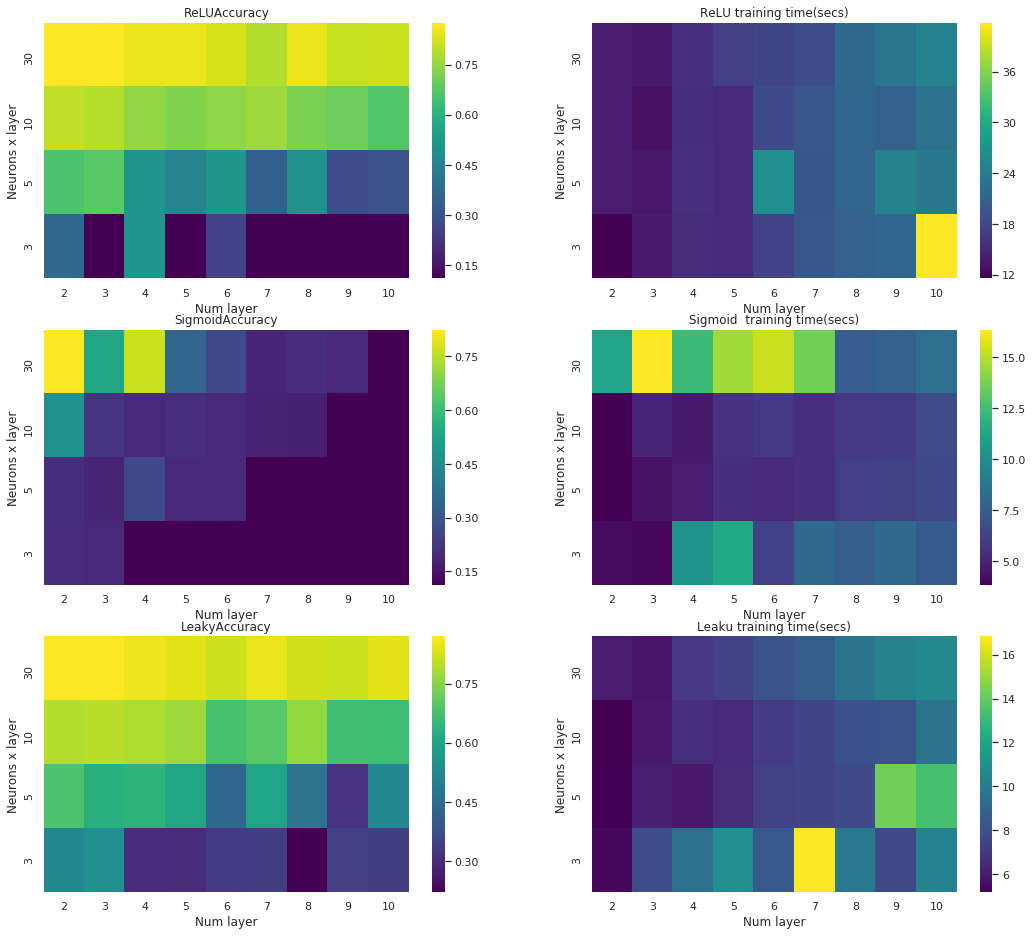

In [8]:
import seaborn as sns; sns.set()
acc = 'Accuracy'
time_fit = ' training time(secs)'
titles = ['ReLU'+acc, 'ReLU'+time_fit,'Sigmoid'+acc,'Sigmoid '+time_fit,'Leaky'+acc,'Leaku'+time_fit]
iter = 1;
plt.figure(figsize=(18,16))
models = [reluAcc, reluTime, sigAcc, sigTime, leakyAcc, leakyTime]
for model, title in zip(models, titles):
    #plt.figure(figsize=(18,16))
    plt.subplot(3,2,iter)
    iter+=1
    
    ax=sns.heatmap(model, cmap='viridis')
    ax.set_xticklabels(layers)
    ax.set_yticklabels(neurons)
    ax.set_title(title)
  
    plt.ylabel('Neurons x layer')
    plt.xlabel('Num layer')
 





Your visualizations must look similar to these ones:

![alt text](./Images/lab_vanishing_01.png)
![alt text](./Images/lab_vanishing_02.png)
![alt text](./Images/lab_vanishing_03.png)
![alt text](./Images/lab_vanishing_04.png)
![alt text](./Images/lab_vanishing_05.png)


/opt/miniconda/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


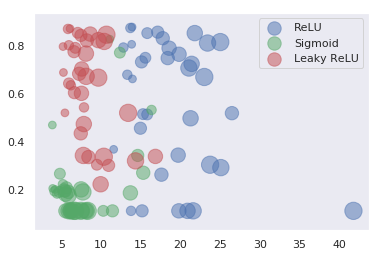

In [10]:
layers = np.arange(2,11)
plt.scatter(reluTime, reluAcc, s=layers*30, c='b', alpha=0.5,label='ReLU')
plt.scatter(sigTime, sigAcc, s=layers*30, c='g', alpha=0.5, label= 'Sigmoid')
plt.scatter(leakyTime, leakyAcc, s=layers*30, c='r', alpha=0.5, label = 'Leaky ReLU')
plt.legend()
plt.grid('off')


In [11]:
relu_x = np.mean(reluTime, axis=0)
relu_y = np.mean(reluAcc, axis=0)

sig_x = np.mean(sigTime, axis=0)
sig_y = np.mean(sigAcc, axis=0)

leaky_x = np.mean(leakyTime, axis=0)
leaky_y = np.mean(leakyAcc, axis=0)



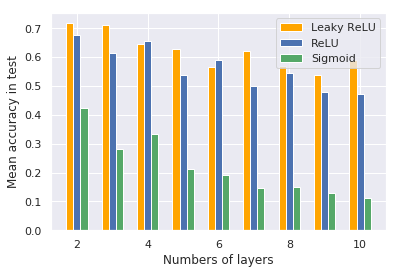

In [12]:
plt.bar(layers-0.2, leaky_y, width=0.2, color = 'orange', label = 'Leaky ReLU')
plt.bar(layers, relu_y, width=0.2, color = 'b', label='ReLU')
plt.bar(layers+0.2, sig_y, width=0.2, color = 'g', label='Sigmoid')

plt.xlabel('Numbers of layers')
plt.ylabel('Mean accuracy in test')
plt.legend()


In [ ]:

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)